In [64]:
import os
import tarfile
import urllib

In [65]:
# 깔금한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [177]:
import pandas as pd
import numpy as np
import itertools

In [67]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets",'housing')
HOUSING_URL = DOWNLOAD_ROOT + 'datasets/housing/housing.tgz'
def fetch_housing_data(housing_url = HOUSING_URL,housing_path = HOUSING_PATH):
    os.makedirs(housing_path,exist_ok = True) 
    # 폴더 생성 경로에 폴더가 없을 경우 자동으로 생성해주는 mkdir -p옵션을 이용할 수 있는 파이썬 코드가
    # makedirs(exist_ok = True) 이다.
    tgz_path = os.path.join(housing_path,'housing.tgz')
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path) # tarball압축 해제!
    housing_tgz.close()

In [68]:
fetch_housing_data()

In [69]:
import pandas as pd
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path,'housing.csv')
    return pd.read_csv(csv_path)

In [70]:
housing = load_housing_data()

In [71]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [72]:
housing_target = housing.median_house_value

In [73]:
housing_prepared_index = housing.columns.difference(housing['median_house_value'])

In [74]:
housing_prepared = housing[housing_prepared_index]

### EDA시작

In [75]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [78]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [76]:
housing.describe(include = 'all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


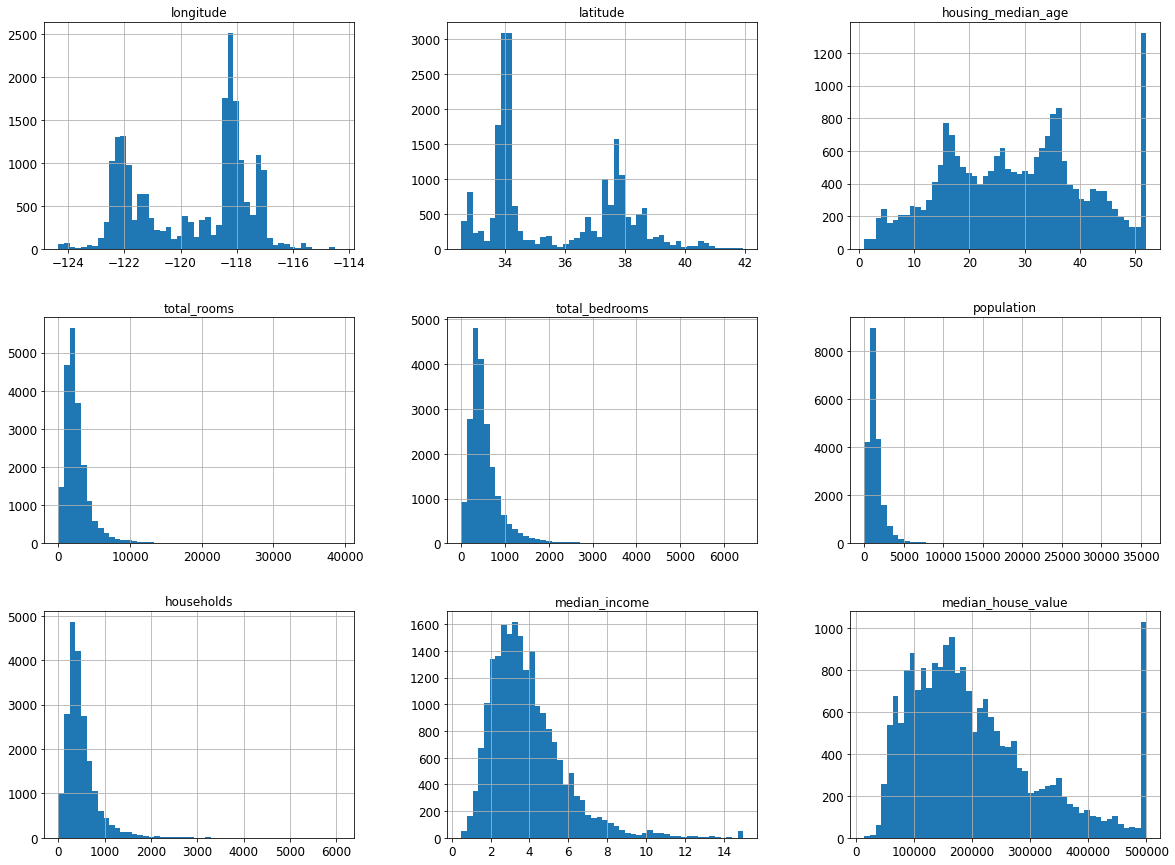

In [77]:
housing.hist(bins = 50,figsize = (20,15))
plt.show()

age와 target값이 최대값 기준으로 한계값이 설정되어있는 듯

상관계수 보기

In [79]:
housing.corr()['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

데이터 채워넣기

In [80]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [84]:
median = housing.total_bedrooms.median()
housing.total_bedrooms = housing.total_bedrooms.fillna(median)

sklearn SimpleImputer있다는 것 잊지 말자

In [86]:
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [87]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

1차 예상.. 쓸모없는 변수가 누굴까

In [236]:
housing.corr()['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049457
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.233303
Name: median_house_value, dtype: float64

##### 중간 소득이 중요하다고 가정,,

테스트 세트가 전체 데이터 셋에 있는 여러 소득 카테고리르 잘 대표해야함

#### 구간을 설정하자

In [100]:
# 구간 : [0,1.5)~> 0 이상 1.5 미만 (뒷부분 미포함)
housing['income_cat'] = pd.cut(housing.median_income,bins = [0,1.5,3,4.5,6,np.inf],labels = [1,2,3,4,5])

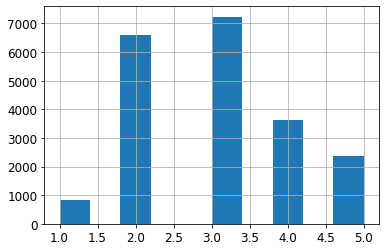

In [101]:
housing.income_cat.hist()

계층 샘플링 직접 코드로 짜보자

In [119]:
# 코딩으로 짜보자
Ratio = round(housing.income_cat.value_counts() / housing.income_cat.value_counts().sum(),2)
Ratio

3    0.35
2    0.32
4    0.18
5    0.11
1    0.04
Name: income_cat, dtype: float64

아래 코딩 활용 ~> 인덱스 제거.
```
import numpy as np
import itertools

a = np.array([1,2,3,4,5,6,7,8,9])
index=[2,3,6]
a = np.array(list(itertools.compress(a, [i not in index for i in range(len(a))])))
a
```

In [178]:
def Stratifiedsample(data,ratio):
    # 코딩으로 짜보자
    Ratio = round(housing.income_cat.value_counts() / housing.income_cat.value_counts().sum(),2) # 기존 데이터의 비율.
    test_indices_list = []
    test_indices_total = []
    for i in sorted(list(Ratio.index)):
        test_indices_list.append(list(housing[housing.income_cat==i].sample(frac= ratio).index))
        test_indices_total.extend(list(housing[housing.income_cat==i].sample(frac= ratio).index))
    
    # Train indices 구하기.
    Total_indices = list(data.index)
    train_indices = itertools.compress(Total_indices,[i not in test_indices_total for i in range(len(Total_indices))])
    
    test_data_list = []
    for i in range(len(test_indices_list)):
        test_data_list.append(housing.iloc[indices_list[i]])
        
    train_data = data.loc[train_indices]
    test_data = pd.concat(test_data_list,axis = 0)
    return train_data, test_data

In [195]:
%%time
strat_train_data1, strat_test_data1 = Stratifiedsample(housing,0.2)

Wall time: 1.98 s


In [189]:
strat_train_data1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,income_cat
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467,3
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,4.931907,0.192899,2.128405,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209,2


In [190]:
strat_test_data2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,6.715625,0.156972,2.275000,5
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN,6.388633,0.157490,2.563748,4
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN,4.973744,0.212532,2.408676,3
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND,5.546584,0.171333,3.161491,3
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND,5.877483,0.176901,3.533113,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20519,-121.53,38.58,33.0,4988.0,1169.0,2414.0,1075.0,1.9728,76400.0,INLAND,4.640000,0.234362,2.245581,2
17430,-120.44,34.65,30.0,2265.0,512.0,1402.0,471.0,1.9750,134000.0,NEAR OCEAN,4.808917,0.226049,2.976645,2
4019,-118.49,34.18,31.0,3073.0,674.0,1486.0,684.0,4.8984,311700.0,<1H OCEAN,4.492690,0.219330,2.172515,4
12107,-117.32,33.99,27.0,5464.0,850.0,2400.0,836.0,4.7110,133500.0,INLAND,6.535885,0.155564,2.870813,4


라이브러리 이용

In [191]:
from sklearn.model_selection import StratifiedShuffleSplit

In [192]:
split = StratifiedShuffleSplit(n_splits = 1, test_size= 0.2,random_state = 42)

In [194]:
%%time
for train_index, test_index in split.split(housing,housing['income_cat']):
    strat_train_data2 = housing.loc[train_index]
    strat_test_data2 = housing.loc[test_index]

Wall time: 32 ms


##### 내가 짜논 코드와 라이브러리 코드  비교

속도는.. 라이브러리 코드가 우수

크기 비교

In [186]:
strat_train_data1.shape, strat_train_data2.shape

((16513, 14), (16512, 14))

In [196]:
strat_test_data1.shape, strat_test_data2.shape

((4127, 14), (4128, 14))

계층별 샘플 비율 비교

In [197]:
# 직접 짠 코드
strat_train_data1.income_cat.value_counts()/strat_train_data1.income_cat.value_counts().sum()

3    0.350572
2    0.318840
4    0.176285
5    0.114455
1    0.039847
Name: income_cat, dtype: float64

In [198]:
# 라이브러리 코드
strat_train_data2.income_cat.value_counts() /strat_train_data2.income_cat.value_counts().sum()

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

### 데이터 나누는 것 알지만 한번 쭉 복습

##### train, test분리

방법 1) 

In [26]:
def split_train_test(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [27]:
train1, test1 = split_train_test(housing,0.2)

방법2) 해시값 이용

In [32]:
from zlib import crc32

In [44]:
def test_set_check(indentifier,test_ratio):
    return crc32(np.int64(indentifier)) & 0xffffff < test_ratio * 2 **32

In [45]:
def split_train_test_by_id(data,test_ratio,id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_ : test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [46]:
housing_with_id = housing.reset_index()

In [47]:
train_set,test_set = split_train_test_by_id(housing_with_id,0.2,'index')

방법3) 우리가 아는 그것

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
train_set, test_set = train_test_split(housing,test_size = 0.2,random_state = 42)

이어서 시작

##### LabelEncoder

In [202]:
strat_train_data1.ocean_proximity = strat_train_data1.ocean_proximity.astype('category')

In [205]:
# 이것으로 LabelEncoder해도 되지만,, OnehotEncoder진행해보자
strat_train_data1.ocean_proximity.cat.codes

0        3
1        3
2        3
4        3
6        3
        ..
20634    1
20635    1
20636    1
20637    1
20638    1
Length: 16513, dtype: int8

In [211]:
# 희소행렬... 
pd.get_dummies(strat_train_data1.ocean_proximity).values

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]], dtype=uint8)

In [212]:
# sklearn 이용
from sklearn.preprocessing import OneHotEncoder

In [232]:
cat_encoder = OneHotEncoder()
train_ocean_1hot = cat_encoder.fit_transform(np.array(strat_train_data1.ocean_proximity.values).reshape(-1,1)) # 위에 category로 바꿔버러서..ㅠㅠ

In [234]:
train_ocean_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

지금까지 했던 작업<br>
1. fillna
2. 파생변수 생성<br>


<b> 순서 변경</b>
3. 수치형, 범주형 변수 나누기, <br>그리고 수치형은 표준화, 범주형은 onehotencoder(LabelEnconder 경우 오해 발생 여지 때문..)  ~ train,test 
4. train,test data나누기(계층샘플링) 
 

##### 파생변수 추가 속성 넣기

In [239]:
from sklearn.base import BaseEstimator, TransformerMixin

In [286]:
housing2.loc[:,list(housing2.columns.difference(housing2.columns[housing2.dtypes == 'object']))]

,households,housing_median_age,latitude,longitude,median_house_value,median_income,population,total_bedrooms,total_rooms
0,126.0,41.0,37.88,-122.23,452600.0,8.3252,322.0,129.0,880.0
1,1138.0,21.0,37.86,-122.22,358500.0,8.3014,2401.0,1106.0,7099.0
2,177.0,52.0,37.85,-122.24,352100.0,7.2574,496.0,190.0,1467.0
3,219.0,52.0,37.85,-122.25,341300.0,5.6431,558.0,235.0,1274.0
4,259.0,52.0,37.85,-122.25,342200.0,3.8462,565.0,280.0,1627.0
...,...,...,...,...,...,...,...,...,...
20635,330.0,25.0,39.48,-121.09,78100.0,1.5603,845.0,374.0,1665.0
20636,114.0,18.0,39.49,-121.21,77100.0,2.5568,356.0,150.0,697.0
20637,433.0,17.0,39.43,-121.22,92300.0,1.7000,1007.0,485.0,2254.0
20638,349.0,18.0,39.43,-121.32,84700.0,1.8672,741.0,409.0,1860.0


TypeError: only size-1 arrays can be converted to Python scalars

In [432]:
housing2.iloc[:,3]

0         880.0
1        7099.0
2        1467.0
3        1274.0
4        1627.0
          ...  
20635    1665.0
20636     697.0
20637    2254.0
20638    1860.0
20639    2785.0
Name: total_rooms, Length: 20640, dtype: float64

In [450]:
income_cat = pd.cut(housing2.iloc[:,7].values,bins = [0,1.5,3.0,4.5,6,np.inf],labels = [1,2,3,4,5])

In [451]:
income_cat

[5, 5, 5, 4, 3, ..., 2, 2, 2, 2, 2]
Length: 20640
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [452]:
housing2.iloc[:,7] = income_cat
housing2.iloc[:,7]

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: median_income, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [487]:
housing2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [486]:
list(housing2.columns).index('median_income')

7

In [502]:
A = np.array([1,2,3,4,5])
A[0] = 0
A

array([0, 2, 3, 4, 5])

In [686]:
# 자체가 Numpy로 받는다!
class Attribute_Adj(BaseEstimator,TransformerMixin):
    
    def __init__(self,rooms_ix=3,bedrooms_ix=4,population_ix=5,households_ix=6,median_income_ix = 7,Derivation = False,TypeDivide = False,Split = False,): # 파이프라인 짤 때 반응하게끔 만들자!
        """
        아래 에러 때문에
        only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
        
        열의 인덱스를 직접 입력했음
        
        input Type고정시키자
        
        """
        self.Derivation = Derivation # input : numpy
        self.TypeDivide = TypeDivide # input : DataFrame
        self.Split = Split # input : DataFrme()
        self.rooms_ix = rooms_ix
        self.bedrooms_ix = bedrooms_ix
        self.population_ix = population_ix
        self.households_ix = households_ix
        self.median_income_ix = median_income_ix
        
    def fit(self,X,y = None):
        return self
    
    def transform(self,X):
        if self.Derivation:
            rooms_per_household = X[:,self.rooms_ix] / X[:,self.households_ix]
            
            bedrooms_per_room = X[:,self.bedrooms_ix] / X[:,self.rooms_ix]
            population_per_household = X[:,self.population_ix] / X[:,self.households_ix]
            X = np.c_[X,rooms_per_household,bedrooms_per_room,population_per_household]
            return X
    
      
    
        """ 출력 순서는 수치형, objectg형 순으로, 애는 DataFrame형태로 준다."""
        if self.TypeDivide:
            attrib_cat_indices = list(X[X.columns[X.dtypes == 'object']])
            attrib_cat = X.loc[:,attrib_cat_indices]
            # 열 순서 보존을 위해 sort = Fasle함수 
            attrib_num_indices = list(X.columns.difference(X.columns[X.dtypes == 'object'],sort= False)) # object아닌 data type을 전부 숫자형이라 생각.
            attrib_num = X.loc[:,attrib_num_indices]
            return attrib_num , attrib_cat
        
        """ 출력순서 : Train, Test 순서대로, 애는 DataFrame형태로 준다."""
        if self.Split:
            X.loc[:,'income_cat'] = pd.cut(X.loc[:,'median_income'],bins = [0,1.5,3.0,4.5,6,np.inf],labels = [1,2,3,4,5])
            split = StratifiedShuffleSplit(n_splits =1, test_size = 0.2,random_state = 42)
            for train_index, test_index in split.split(X,X['income_cat']):
                strat_train_data = X.loc[train_index]
                strat_test_data = X.loc[test_index]
                
            return strat_train_data, strat_test_data
        
        else:
            return X

In [608]:
attrib_num_indices = list(housing2.columns.difference(housing2.columns[housing2.dtypes == 'object'],sort = False)) # object아닌 data type을 전부 숫자형이라 생각.

In [609]:
attrib_num_indices

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [413]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2,random_state = 42)

cross_val참고자료 : https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

In [373]:
attri_adj = Attribute_Adj(Derivation=True)

In [288]:
attri_divide = Attribute_Adj(TypeDivide=True)

In [289]:
num_data, cat_data = attri_divide.divide(housing2)

In [291]:
cat_data

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
...,...
20635,INLAND
20636,INLAND
20637,INLAND
20638,INLAND


# 파이프라인 짜기!
마지막에 data 나누기로!

##### housing2라는 새로운 데이터를 대상으로 파이프라인 짜보자

In [709]:
housing2 = load_housing_data()

1st. train, test데이터 나누고,, Train data만 보자!! 

In [710]:
Split_data = Attribute_Adj(Split =True)

In [712]:
train_data , test_data = Split_data.fit_transform(housing2)
train_data_set = train_data.drop(['median_house_value'],axis = 1)
train_data_labels = train_data['median_house_value'].copy()

2nd. 형태에 따라 데이터 나누고

In [713]:
divide_attribute = Attribute_Adj(TypeDivide = True)

In [714]:
att_num, att_cat = divide_attribute.transform(train_data_set)

In [715]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

수치형 데이터 처리하는 파이프라인 짜고

In [716]:
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy = 'median')),
    ('attrib_plus',Attribute_Adj(Derivation = True)),
   ('std_scaler',StandardScaler()),
])

In [717]:
# numpy 넣어도 되고, DataFrame넣어도 된다. 내가 만든 사용자 정의 클래스로 들어갈 때 DataFrame에 있는 값을 자동으로 인식해서 계산..
# 그래서 결과는 numpy배열로 나온다.
att_num_tr = num_pipeline.fit_transform(att_num) 

In [718]:
att_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
         0.15531753, -0.08649871],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.83628902, -0.03353391],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
         0.4222004 , -0.09240499],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.52177644, -0.03055414],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
        -0.30340741,  0.06150916],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
         0.10180567, -0.09586294]])

수치형과 범주형 동시에 처리하는 파이프라인 구축하고

In [719]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [720]:
num_attribs = list(att_num)
cat_attribs = list(att_cat)

full_pipeline = ColumnTransformer([
    ('num',num_pipeline,num_attribs),
    ('cat',OneHotEncoder(),cat_attribs),
])

In [721]:
All_pipe_result = full_pipeline.fit_transform(train_data_set)

In [722]:
pd.DataFrame(All_pipe_result)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,-0.954456,-0.312055,0.155318,-0.086499,1.0,0.0,0.0,0.0,0.0
1,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,1.890305,0.217683,-0.836289,-0.033534,1.0,0.0,0.0,0.0,0.0
2,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,-0.954456,-0.465315,0.422200,-0.092405,0.0,0.0,0.0,0.0,1.0
3,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,-0.954456,-0.079661,-0.196453,0.089736,0.0,1.0,0.0,0.0,0.0
4,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,-0.006202,-0.357834,0.269928,-0.004194,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.722267,-0.673331,1.379547,-0.632123,-0.725361,-0.759010,-0.764049,0.554158,0.942051,0.234352,-0.428853,-0.031755,0.0,1.0,0.0,0.0,0.0
16508,1.007011,-0.823004,0.902385,-0.667196,-0.584183,-0.329664,-0.636291,-0.948815,-0.954456,-0.308114,0.491503,0.084689,0.0,1.0,0.0,0.0,0.0
16509,1.586489,-0.724781,-1.562952,1.043901,0.822735,0.607904,0.713156,-0.316705,-0.006202,0.346934,-0.521776,-0.030554,0.0,1.0,0.0,0.0,0.0
16510,0.782213,-0.851068,0.186642,-0.309919,-0.374849,-0.057178,-0.375451,0.098121,-0.006202,0.024995,-0.303407,0.061509,1.0,0.0,0.0,0.0,0.0


이제 데이터 처리에 대한 파이프라인과 훈련 및 그 이후에 대한 파이프라인을 연결해준다

In [723]:
Result_pipeline = Pipeline([
    ('Transformer',full_pipeline),
])

여기서 input은 train_data!

In [724]:
Result_pipeline.fit_transform(train_data_set)

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

모델 구축 + feature_importances구축 + 세부 튜닝 => 답지 보면서 공부